Dataset Overview:
Total data points: 126
Number of datasets: 42
Number of algorithm versions: 3

Algorithm versions:
  - WATCH_Stage1
  - WATCH_Stage3
  - WATCH_Origin


Text(0, 0.5, 'F1 Score')

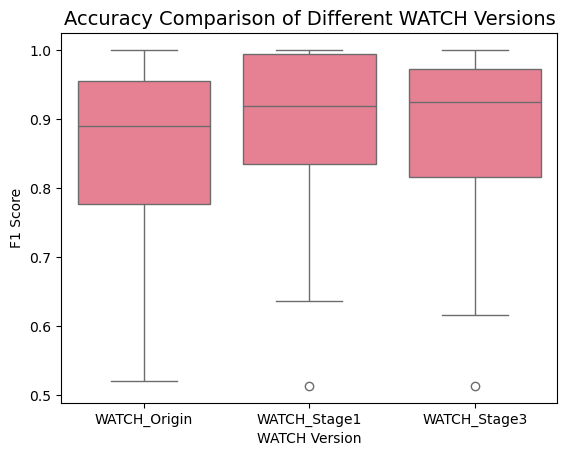

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read data
df = pd.read_csv('./results/hyper_tuning/overall_best_hyperparameters.csv')

# remove all watch_watge_list entries
df = df[~df['algorithm_name'].str.contains('List')]

# remobe the combined_score column
df = df.drop(columns=['combined_score'])

# Basic data information
print("Dataset Overview:")
print(f"Total data points: {len(df)}")
print(f"Number of datasets: {df['dataset_name'].nunique()}")
print(f"Number of algorithm versions: {df['algorithm_name'].nunique()}")
print("\nAlgorithm versions:")
for alg in df['algorithm_name'].unique():
    print(f"  - {alg}")

algorithm_order = ['WATCH_Origin', 'WATCH_Stage1', 'WATCH_Stage3']

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. Performance comparison of different algorithm versions - boxplot
df_melted = df.melt(id_vars=['algorithm_name'], 
                    value_vars=['f1_score'],
                    var_name='metric', value_name='score')
sns.boxplot(data=df_melted, x='algorithm_name', y='score', order=algorithm_order)
plt.title('Accuracy Comparison of Different WATCH Versions', fontsize=14)
plt.xlabel('WATCH Version')
plt.ylabel('F1 Score')